In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import tree

In [3]:
df = pd.read_csv('copy of loan.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.drop('Loan_ID' ,axis = 1 )

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df = df.drop('Loan_ID' ,axis = 1 )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [12]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})

C:\Users\agraw\AppData\Local\Temp\ipykernel_3364\3988868291.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
C:\Users\agraw\AppData\Local\Temp\ipykernel_3364\3988868291.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
C:\Users\agraw\AppData\Local\Temp\ipykernel_3364\3988868291.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [14]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


In [15]:
df = pd.get_dummies(df, columns= ['Property_Area'])

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,False,False,True
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,False,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,False,False,True
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,False,False,True


In [17]:
x = df.iloc[:,:-1]

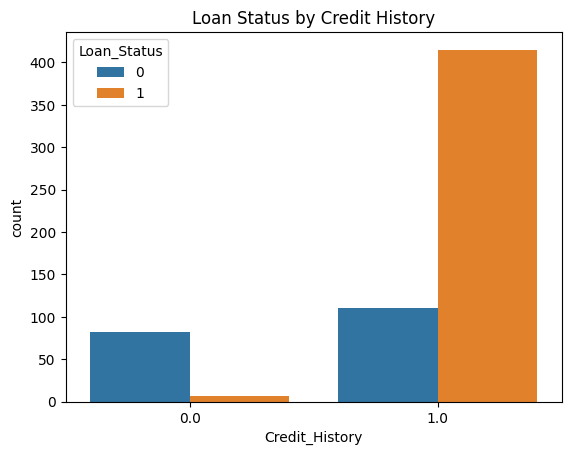

In [18]:
import seaborn as sns


sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status by Credit History')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [21]:
x_train,x_test, y_train , y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [22]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
244,1,1,0,0,0,3406,4417.0,123.0,360.0,1.0,False,True,False
393,1,1,2,0,0,1993,1625.0,113.0,180.0,1.0,False,True,False
310,0,0,0,1,0,2917,0.0,84.0,360.0,1.0,False,True,False
408,1,1,1,1,0,8300,0.0,152.0,300.0,0.0,False,True,False
572,1,1,2,1,0,16666,0.0,275.0,360.0,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,0,1,1875,1875.0,97.0,360.0,1.0,False,True,False
106,1,1,2,1,0,11417,1126.0,225.0,360.0,1.0,False,False,True
270,0,0,0,1,0,3237,0.0,30.0,360.0,1.0,False,False,True
435,0,1,0,1,0,10047,0.0,128.0,240.0,1.0,False,True,False


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
treemodel = DecisionTreeClassifier(max_depth=3 )

In [46]:
treemodel.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
df.loc[3]

Gender                          1
Married                         1
Dependents                      0
Education                       0
Self_Employed                   0
ApplicantIncome              2583
CoapplicantIncome          2358.0
LoanAmount                  120.0
Loan_Amount_Term            360.0
Credit_History                1.0
Loan_Status                     1
Property_Area_Rural         False
Property_Area_Semiurban     False
Property_Area_Urban          True
Name: 3, dtype: object

In [48]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("--------------------------------------------------")


Column: Gender
[1 0]
--------------------------------------------------
Column: Married
[0 1]
--------------------------------------------------
Column: Dependents
[0 1 2 3]
--------------------------------------------------
Column: Education
[1 0]
--------------------------------------------------
Column: Self_Employed
[0 1]
--------------------------------------------------
Column: ApplicantIncome
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071 

[Text(0.4583333333333333, 0.875, 'x[9] <= 0.5\ngini = 0.413\nsamples = 411\nvalue = [120.0, 291.0]'),
 Text(0.25, 0.625, 'x[6] <= 8115.0\ngini = 0.168\nsamples = 54\nvalue = [49, 5]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[5] <= 4316.5\ngini = 0.14\nsamples = 53\nvalue = [49, 4]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.25, 0.125, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[11] <= 0.5\ngini = 0.319\nsamples = 357\nvalue = [71, 286]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'x[6] <= 14166.5\ngini = 0.383\nsamples = 213\nvalue = [55, 158]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.376\nsamples = 211\nvalue = [53, 158]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.375, 'x[8] <= 78.0\ngini = 0.198\nsamples =

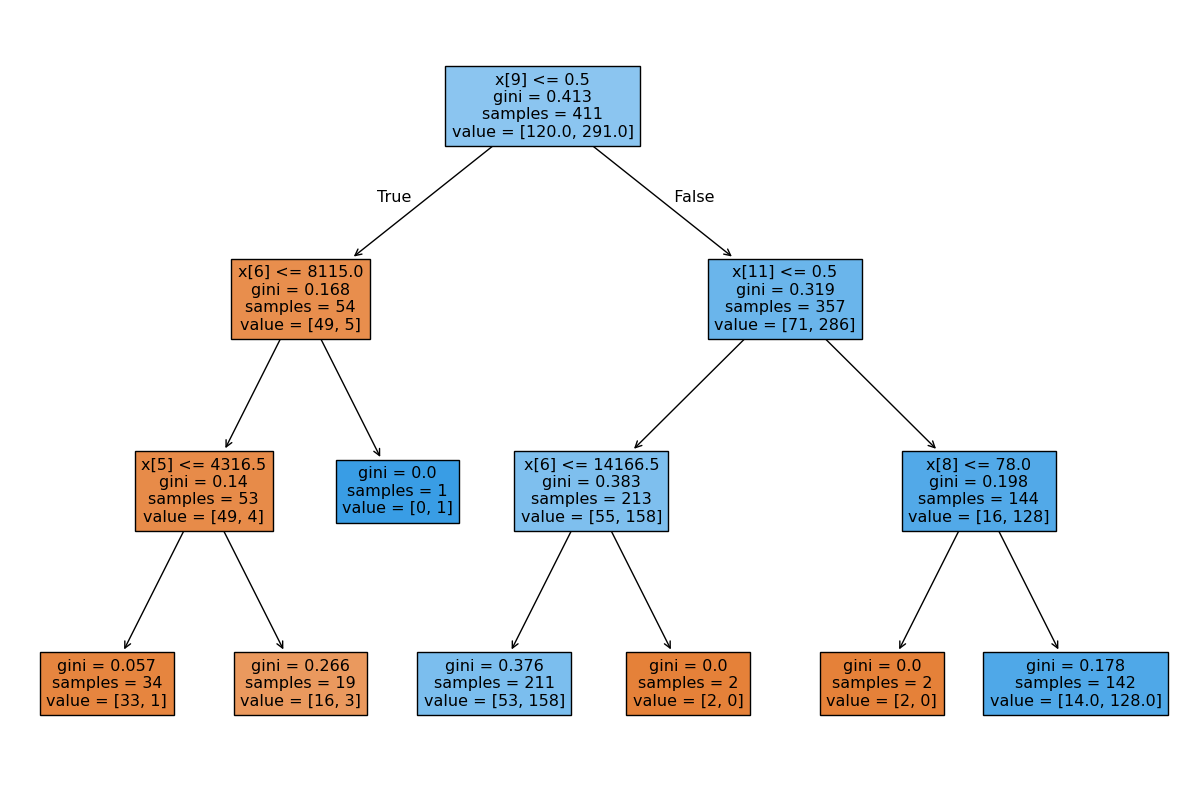

In [49]:
from sklearn import tree
plt.figure(figsize =(15,10))
tree.plot_tree(treemodel, filled = True)

In [50]:
y_pred = treemodel.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report

In [52]:
score = accuracy_score(y_pred, y_test)

In [53]:
score

0.7980295566502463

In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.46      0.94      0.62        35
           1       0.98      0.77      0.86       168

    accuracy                           0.80       203
   macro avg       0.72      0.86      0.74       203
weighted avg       0.89      0.80      0.82       203



In [55]:
from sklearn.model_selection import cross_val_score


# Try depths from 1 to 20
depths = range(1, 21)
cv_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(clf, x_train, y_train, cv=5)  # 5-fold CV
    cv_scores.append(scores.mean())
    print(f"Depth={d}, CV Accuracy={scores.mean():.4f}")

# Best depth
best_depth = depths[np.argmax(cv_scores)]
print("\nBest max_depth:", best_depth)
print("Best CV Accuracy:", max(cv_scores))

# Train final model with best depth
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(x_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(x_test)
final_score = accuracy_score(y_test, y_pred)
print("Test Accuracy with best depth:", final_score)



Depth=1, CV Accuracy=0.8151
Depth=2, CV Accuracy=0.8127
Depth=3, CV Accuracy=0.8175
Depth=4, CV Accuracy=0.7957
Depth=5, CV Accuracy=0.7544
Depth=6, CV Accuracy=0.7446
Depth=7, CV Accuracy=0.7398
Depth=8, CV Accuracy=0.7397
Depth=9, CV Accuracy=0.7227
Depth=10, CV Accuracy=0.7153
Depth=11, CV Accuracy=0.7226
Depth=12, CV Accuracy=0.7202
Depth=13, CV Accuracy=0.7056
Depth=14, CV Accuracy=0.7031
Depth=15, CV Accuracy=0.7105
Depth=16, CV Accuracy=0.7081
Depth=17, CV Accuracy=0.6959
Depth=18, CV Accuracy=0.6959
Depth=19, CV Accuracy=0.6959
Depth=20, CV Accuracy=0.6959

Best max_depth: 3
Best CV Accuracy: 0.8175433441081399
Test Accuracy with best depth: 0.7980295566502463


In [56]:
import pickle

In [58]:
pickle.dump(treemodel, open('treemodel.pkl', 'wb'))